<img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/NSF-Unidata_lockup_vertical_2023.png" width="150px" align="right">

# Machine Learning Analysis in the Earth Systems Sciences

In this module, things happen.

## Scenario Title
Motivating scenario. Play the video below to learn more about how you will take on Sam's task.

*Video opens in a new tab.*

`<video>`

<div class="alert alert-info" role="alert">
<p class="admonition-title" style="font-weight:bold">What is a machine learning engineer?</p>
    <p>Explanation to come</p>
</div>

Now you will begin the process of following the supervised machine learning model framework to address this task, starting with <b>problem framing</b>.
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>

## Part 1: Problem Framing

#### Problem framing questions
As a part of the problem framing step, we answer a series of questions to ensure we're creating the best solution for this scenario. These questions were addressed in the previous module, which you may review below. 

***Does a simpler solution exist?***

&emsp;Predicting the type of precipitation during a winter weather event relies on many different co-varying variables, including differences in temperature and humidity between the surface and clouds and winds, to name a few. A simple conditional statement may not be the most effective tool. 

***Can machine learning requirements be met?***

&emsp;Sam will use a weather forecasting model in combination with citizen scientist precipitation type reports during winter weather events. They will have thousands of data records to use in development. 

***Which scientific question should be answered?***

&emsp;"Will the precipitation at a certain location and time be rain or snow?"

<br>

## Part 2: Data Handling

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>
<br><br>

Data handling is the multi-step process for preparing data for model development. Remember that model performance and accuracy are limited by the quality of data it uses as input. Taking the time to ensure data are representative of a variety of scenarios seen in nature is a crucial step in machine learning analysis.

Data handling includes three major steps:
1. Locate data of interest
1. Explore data
1. Create a data splitting strategy

<br>

### Part 2a: Locate Data of Interest

Sam and the team used data from <a href="https://mping.nssl.noaa.gov/" target="blank">mPing</a> and `Big Model`. `<expand>`They have permission to use these datasets as they are open-access. `</expand>`

For each instance of precipitation submitted to mPing, they matched the report with model-generated environmental conditions at the time location of the report.

`<graphic from video to demonstrate>`



#### FAIR data principles

As Sam and the team engineer this combination of datasets for development of the machine learning model, they learn about the importance of making their data easy for others to find, access, and use. This idea is captured in the <a href="https://www.go-fair.org/fair-principles/" target="blank">FAIR principles</a>. FAIR principles ensure that data are Findable, Accessible, Interoperable, and Reusable by the scientific community. To support potential future collaborations and general scientific progress, they want to share their engineered dataset so other researchers can review their work or build upon it. Following FAIR principles helps ensure that research is transparent, reusable, and contributes to the peer-review process that keeps science reliable and open to improvement.
 <br><br>

To clearly document the source and nature of the data, they have created the following metadata document. Review this information before starting the next step: exploring the data. 

<div class="alert alert-info" role="alert">

#### Metadata Document for Preciptation Type Classification Data

##### General Information

Dataset Name: 

Description: 

Date Range: 

Geographic Coverage: Continental United States 

Data Frequency: 

Last Updated: 

##### Data Structure

File Format: .parquet

Number of Records: 

Columns:

- TEMP_C_0_m: Air temperature (°C) at 0 meters above ground level.
- T_DEWPOINT_C_0_m: Dewpoint (°C) at 0 meters above ground level.
- PRES_Pa_0_m: Environmental pressure (Pa) at 0 meters above ground level.
- UGRD_m/s_0_m: U-component (west to east) of wind speed (m/s) at 0 meters above ground level.
- VGRD_m/s_0_m: V-component (south to north) of wind speed (m/s) at 0 meters above ground level.
- ptype: Precipitation type reported to mPing ("rain" or "snow")

##### Data Quality

Missing Data: 

Outlier Handling:  

##### Data Provenance

Sources:

</div>
<br><br>

### Part 2b: Explore Data

Now it's your turn to explore the data that Sam has prepared. Before starting an analysis of any kind, it's important to familiarize yourself with the data before you use it. This way, you can identify any issues or limitations in the dataset before you start generating statistics or transforming the data. In this step, you will take a closer look at the potential features for your model with a few plots.

First, let's read the data into this workspace. To begin, we must import several Python packages that locate and parse the data. The data resides on a remote THREDDS Data Server, which serves data to users without the need to manually download files to a local computer. When you execute the code cell below, you will load the Python library pandas that includes all the tools for reading the data from the THREDDS Data Server and opening it in this workspace.

> **Instructions**
> 
> Execute the  cell below.
> 
> *This may take a moment to complete.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# I didn't need this, and we didn't have this in Module 3
# I think it's baked into numpy? I remember installing it in this env somewhere
# import pyarrow

# Location of the data on the THREDDS data server
file_path = '../ptype_data/ptype_sampled.parquet'

# Read data into this workspace
df = pd.read_parquet(file_path) 

#### Explore target features
Target features are the features we predict using a machine learning model. Since this is a classification task, the target features are the classes "rain" and "snow."

#### Explore input features
Input features are the variables that the model uses to predict the target features. In this case, the input features are the environmental variables from `Big Model`. 

As we explore the input features, we examine the following characteristics: 

- Distribution of values
- Unusual values or outliers
- Correlation among variables

We'll start by visualizating the graphical distribution of values as histograms. In the plotting widget below, you can choose to view all data, or visualize the differences in distribution by precipitation type. 

We can also supplement these graphical representations of spread with a summary statistics table. Examine the statistics to locate any unusual values, or those that do not seem to be physically plausible. 

> **Instructions**
>
> Execute the cell below to generate a summary statistics table of the input features.
>
> The table includes the following statistics.
>
> | label | definition |
> |----|----|
> | count  | number of records |
> | mean | average |
> | std    | standard deviation   |
> | min | minimum value |
> | 25%, 50%, 75% | 25th, 50th, and 75th percentile of the distribution, respectively |
> | max | maximum value |

In [2]:
df.describe()

,TEMP_C_0_m,T_DEWPOINT_C_0_m,PRES_Pa_0_m,UGRD_m/s_0_m,VGRD_m/s_0_m
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.191655,4.295661,97771.921875,0.245982,-0.635261
std,11.015686,10.693260,4340.965332,3.244669,3.497568
min,-19.339417,-23.740677,68586.640625,-12.982805,-12.780014
25%,-0.677414,-3.349205,97349.937500,-1.848213,-2.909421
50%,2.912354,0.713211,98749.937500,-0.040516,-0.531640
75%,17.254036,14.244499,100049.683594,2.224049,1.671326
max,33.993225,26.039459,103628.171875,11.791678,11.930449


Next we'll compare the input features more directly by comparing all records in a grid of plots. In these comparison grids, the scatter plots display the input features a given time. For example, the temperature at 0 m on the x-axis and the dewpoint at 0 m on the y-axis. The scatter plot markers denote the precipitation type, `x` for rain and `y` for snow. Scatter plots that show distinct clustering of precipitation types demonstrate that the input variables may be better predictors of rain versus snow. Where rain and snow markers are uniformly distributed, the input features show reduced skill in differentiating rain and snow. 

`graphical demonstration`

The comparison plot grid displays histograms where the x- and y-axes are the same station. These are the same histograms that you plotted previously, displaying the distribution of all records by precipitation type.

> **Instructions**
> 
> Execute the cell below.


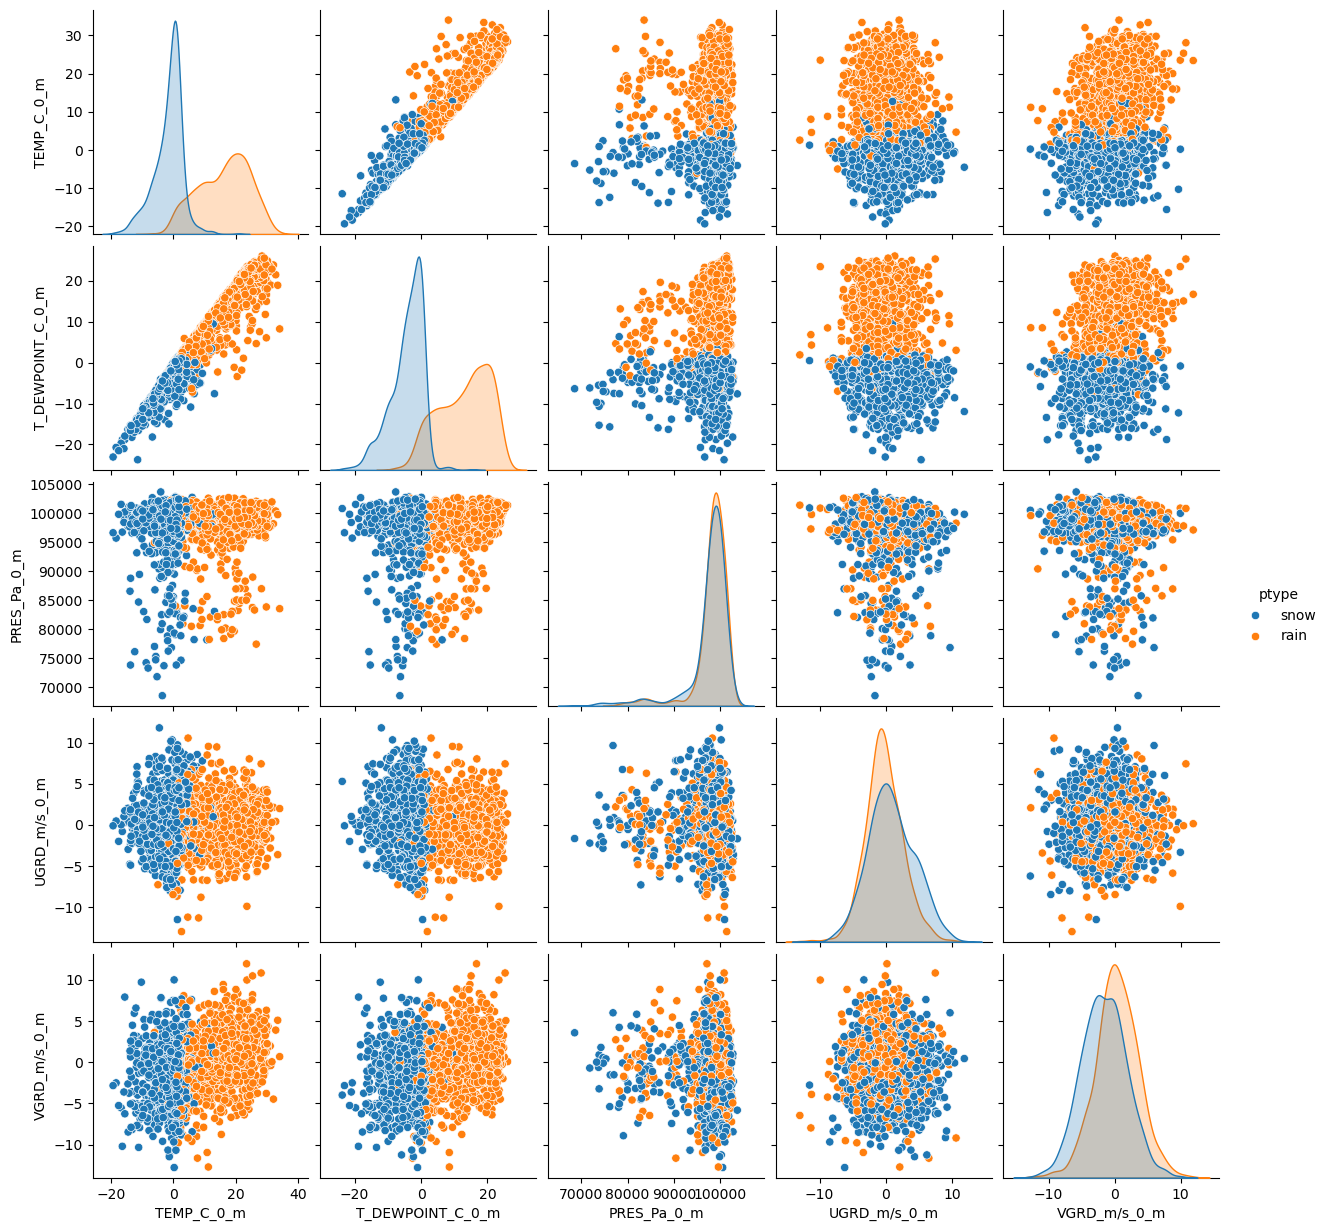

In [3]:
sns.pairplot(df, hue='ptype')

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise X</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise X. Then describe your exploratory data analysis of any target and input features of note. Include the following:
    <ul>
        <li>Do the distributions of values make sense for the physical world?</li>
        <li>Are there any unexpected values?</li>
        <li>Which input features may be the strongest predictors of rain vs snow?</li>
        <li>Include any <i>important</i> plots to illustrate your conclusions. Limit yourself to 5 plots. <br><i>To copy a plot image, hold shift, right click on the image, then select Copy.</i></li>
    </ul>
    </p>
</div>

<br>

Next we can plot the Correlation Matrix. As the name suggests, this will show us the correlation between variables. The closer the absolute value is to 1, the stronger the relationship between these variables is. Notice how all of our diagonal values equal to 1? this is because they represent the correlation between a variable and itself. Can you see which other variables have strong correlations?

For further reading, visit [Correlation Matrix, Demystified](https://towardsdatascience.com/correlation-matrix-demystified-3ae3405c86c1)

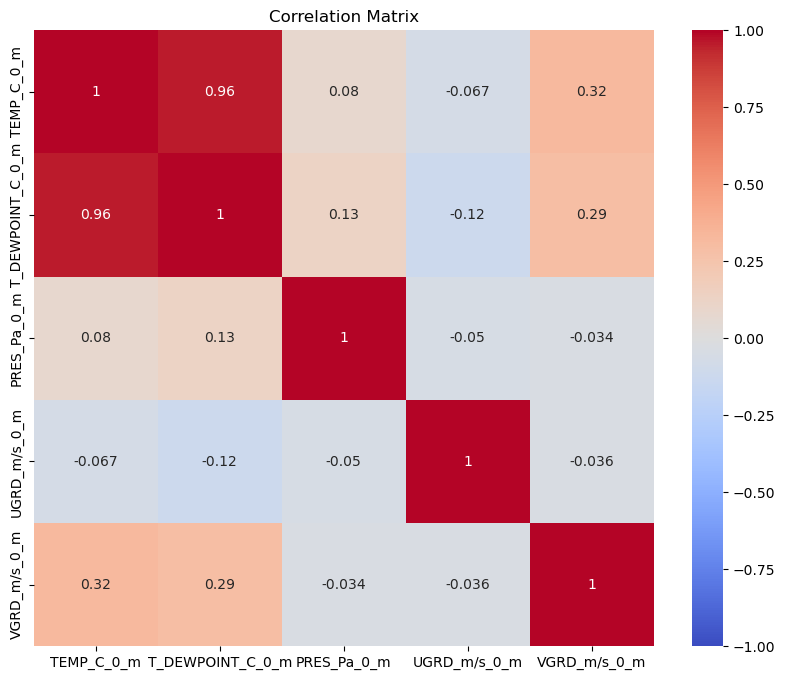

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

### Part 2c: Create a data splitting strategy

Next we create a data splitting strategy. Data splitting refers to the process of dividing data into three groups: training, validation, and testing. Each of these groups represent a part of the iterative process for machine learning model development. 

- Training data is the largest subset, usually around 60-80% of the total data, and is used to initially train the model. 
- Validation data is roughly 10-20% of the total data, and is used to validate the effectiveness of the training process. 
- Testing data is also roughly 10-20% of the total data, and is used to test the final refined model before using it on new, unseen data.

Each group should be separate to ensure no single group will bias the model. In this model, the data will be randomly split into these groups, but you decide the proportions of data for each group. Input your percentages in the blanks below, ensuring all percentages equal 100%.

> **Instructions**
> 
> Execute the two cells below.
>
> In the Dataset Split Percentages widget, select the proportions of the total dataset you wish to use in each group by typing in each box. Use values 0-100, ensuring that the sum of all three boxes equals 100.
>
> Select Submit after making your selection.

---

between these divider bars - move to splitting widget (above)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['TEMP_C_0_m', 'T_DEWPOINT_C_0_m', 'UGRD_m/s_0_m', 'VGRD_m/s_0_m', 'PRES_Pa_0_m' ]]
y = df['ptype']

In [ ]:
# Splitting into training and temporary set (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting the temporary set into testing and validation sets (20% testing, 10% validation of the original dataset)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing and validation data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

---

<br>
<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2c</p>
    <p>In your <b>Machine Learning Model Handbook</b> Exercise 2c, input your data splitting strategy. </p>
</div>
<br>

## Part 3: Model Development
Next begins the iterative process of creating, evaluating, and refining your machine learning model. You will start with an initial model, and keep track of your subsequent trials in your Machine Learning Model Handbook. 
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>

### Part 3a: Choose Algorithm
First, you will choose an algorithm to train. You have two options: the *`x`* and the *`y`*. Both have pros and cons for this task. Choose one for your initial model, but you may choose to test the other algorithm in subsequent trials. 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Algorithms</p>
    <p class="admonition-title" style="font-weight:bold">X</p>
    <ul>
        <li>x</li>
        <li>x</li>
    </ul>
    <p class="admonition-title" style="font-weight:bold">Y</p>
    <ul>
        <li>y</li>
        <li>y</li>
</div>

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `algorithm_selection()`, select the corresponding button to select your desired algorithm.

### Part 3b: Choose input features

Given your data exploration, you must now choose the input features to train the algorithm you just selected. You may choose as many input features as you'd like, however, more features does not always create a better model. Think strategically based on the evidence you gained from exploring the data. 

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `create_station_selector()`, select the stations you would like to use to train your model. You may select as many or as few as you consider necessary.

> **Instructions**
> 
> Execute the cell below to commit your input feature selection. The output will also be used in describing subsequent evaluation metrics. 

This next block of code takes the full dataset and removes (filters) any stations that were not selected above. We do this for all groups (training, validation, and testing). 

<br>

> **Instructions**
> 
> Execute the two cells below. In the printout display, you will see the number of features (columns) in the original dataset, and the number of features in the filtered dataset. 

### Part 3c: Train the Algorithm

The training process is what transforms the machine learning algorithm into a supervised machine learning model. The cells below start the training process with all the decisions you previously made. 

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `train_button()`, select the Train Algorithm button to initiate the training process. A progress printout will display below the button while the process runs. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [ ]:
# Train the model with the training data
model.fit(X_train_scaled, y_train)

### Part 3d: Validate the Model

The validation step uses validation data to evaluate how well the training process performed. By using a separate dataset to evaluate performance, we get a better sense of how well the model can generalize to new inputs. 

> **Instructions**
> 
> Execute the two cells below.
>
> After executing `model_eval_MITC()`, your model's validation metrics will appear below as a printout. 

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the unique class labels
class_labels = model.classes_  # If using sklearn model
# OR
class_labels = np.unique(y_test)  # Alternative way

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Metrics (rework to fit into story)

Accuracy, Recall, and F1 Score are key metrics used to evaluate classification models, each providing different insights into model performance.

Accuracy measures the overall proportion of correct predictions (both classes) out of all predictions made. While intuitive, accuracy alone can be misleading, especially if one is more interested in a specific class's performance. In your rain vs snow classification, an accuracy of 0.85 would mean the model correctly predicts the weather condition 85% of the time.

Recall (also known as sensitivity) measures the proportion of actual positive cases (rain) that were correctly identified. For example, a recall of 0.90 means the model correctly identified 90% of all actual rain events. This is particularly important when missing a positive case (rain) could have significant consequences.

The F1 Score provides a balanced measure by combining precision (accuracy of positive predictions) and recall into a single metric. It ranges from 0 to 1, where 1 represents perfect precision and recall. The F1 Score is particularly useful for balanced datasets like yours, as it gives equal weight to both precision and recall, providing a more comprehensive view of the model's performance than any single metric alone.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, balanced_accuracy_score

# Get various metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='rain')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

### Part 3e: Evaluate and Refine the Model

Examine the results of the model validation. What do each mean? Could they be improved? Review the descriptions of the evaluation metrics, then complete the next exercise. 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3e</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3e. </p>
    <p>Paste your validation evaluation metrics in the designated box. </p>
    <p>Then describe the results of your initial model validation. Include the following:</p>
    <ul>
        <li>Which variables have favorable evaluation metrics? Which variables don’t perform as well?</li>
        <li>How do you interpret these statistics in the context of the physical world?</li>
        <li>What changes will you make to try to improve these statistics in the next iteration?</li>
    </ul>
</div>

### Part 3f: Iterative Refinement Trials

Your first trial is complete! Now you'll create new trials to improve the evaluation metrics from the validation phase. You may complete as many trials as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. 

> **Instructions**
> 
> Execute the code cells below, selecting your desired model configurations after executing each cell.
> 
> After each new trial, you will copy the validation metrics in your handbook document. See **Exercise 3f**.
>
> You may complete as many trials in this section (3f) as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. 


#### New trial: Choose algorithm 

#### New trial: Choose input features

#### New trial: Train algorithm

#### New trial: Validate model

<br>
<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3f</p>
    <ul>
        <li><b>In your Machine Learning Model Handbook Exercise 3f,</b> paste the full output of each of your validation trials, one per box. </li>
        <li>You may complete as many trials as you like until you are satisfied with the evaluation metrics, or they no longer improve with new trials. When complete, move on to the next part below. </li>
    </ul>
</div>
<br>

### Part 3g: Test Model

<div class="alert alert-warning" role="alert">
<p class="admonition-title" style="font-weight:bold">Important</p>
    For testing, your model needs to be in a state with your desired algorithm and input features. If you haven't already, go back and run through the cells in Part 3f with your final choices one last time. This ensures that your final testing process will be executed with your desired choices. 
</div>
<br>
At this point, you have a trained model with validation metrics you are satisfied with. Next, it's time to test the model on brand new data: the testing dataset. The testing process mimics how the model would be used in a real-world process in a final, unbiased way. 
<br><br>
Testing looks very similar to validation. The model makes predictions based on the input features in the testing dataset, we calculate 

`x` as the testing metrics. 

> **Instructions**
> 
> Execute the cell below.
>
> After executing `model_eval_MITC()`, your model's testing metrics will appear below as a printout. 

In [ ]:
# Predicting the Validation set results
y_val_pred = model.predict(X_val_scaled)

# Get various metrics for validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val, recall_val, f1_val, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary', pos_label='rain')

print(f"Accuracy on Validation Set: {accuracy_val:.3f}")
print(f"Precision on Validation Set: {precision_val:.3f}")
print(f"Recall on Validation Set: {recall_val:.3f}")
print(f"F1 Score on Validation Set: {f1_val:.3f}")

### Part 3h: Evaluate and Justify

#### Your final decision

Given all your evaluation, it's time to make a final decision on whether you believe this model provides sufficient skill for the needs of the situation. Go back and review your problem statement. Does this model deliver the results needed?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3h</p>
    <p>Open your <b>Machine Learning Model Handbook</b> to Exercise 3h.</p>
    <p>Paste your testing evaluation metrics in the designated box. </p>
    <p>Then  make a final decision on whether this model delivers on the results needed with supporting justification. Include the following:
    <ul>
        <li>Which environmental variables had the best evaluation metrics? List some physical scientific reasons why this may be the case.</li>
        <li>Is this model ready for use in the real world? Why or Why not?</li>
        <li>What other possible changes could further improve this model?</li>
    </ul>
    </p>
</div>

***

---

---

## Different dataset, different results?

Let's look at another dataset. This dataset just has snow and freezing rain as the p-types, so overall it will be colder. Let's see if we get similar results.

In [ ]:
df_frza = pd.read_parquet(r'../ptype_data/ptype_sampled_frza.parquet')

In [ ]:
df_frza.describe()

In [ ]:
sns.pairplot(df_frza, hue='ptype')

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_frza.select_dtypes(include=['number']).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

What are the differences in EDA compared to rain vs snow? Do you expect this to do better or worse compared to rain vs snow?

### Split up the data & Scale

The following code is a bit compressed, but is the same line for line as above, just with a new dataset.

In [ ]:
X2 = df_frza[['TEMP_C_0_m','UGRD_m/s_0_m','T_DEWPOINT_C_0_m', 'VGRD_m/s_0_m', 'PRES_Pa_0_m' ]]
y2 = df_frza['ptype']

In [ ]:
# Splitting into training and temporary set (70% training, 30% temporary)
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Splitting the temporary set into testing and validation sets (20% testing, 10% validation of the original dataset)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_temp2, y_temp2, test_size=1/3, random_state=42)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform it
X_train_scaled2 = scaler.fit_transform(X_train2)

# Transform the testing and validation data using the same scaler
X_test_scaled2 = scaler.transform(X_test2)
X_val_scaled2 = scaler.transform(X_val2)

Notice the new model! We will be using a [Decision Tree](https://scikit-learn.org/stable/modules/tree.html). If you want to learn more, here is a StatQuest [video](https://www.youtube.com/watch?v=_L39rN6gz7Y).

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
# Train the model with the training data
model.fit(X_train_scaled2, y_train2)

### Test Set ML

In [ ]:
# Predicting the Test set results
y_pred2 = model.predict(X_test_scaled2)

In [ ]:
# Calculate classification metrics for test set
accuracy = accuracy_score(y_test2, y_pred2)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average='binary', pos_label='snow')

print(f"Accuracy on Test Set: {accuracy:.3f}")
print(f"Precision on Test Set: {precision:.3f}")
print(f"Recall on Test Set: {recall:.3f}")
print(f"F1 Score on Test Set: {f1:.3f}")

In [ ]:
# Get the unique class labels
class_labels = model.classes_  # If using sklearn model
# OR
class_labels = np.unique(y_test2)  # Alternative way

# Create confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Create heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

What do you notice in this confusion matrix compared to the one with rain vs snow?

### Validation Set ML 

In [ ]:
# Predicting the Validation set results
y_val_pred2 = model.predict(X_val_scaled2)

# Calculate classification metrics
accuracy_val = accuracy_score(y_val2, y_val_pred2)
precision_val, recall_val, f1_val, _ = precision_recall_fscore_support(y_val2, y_val_pred2, average='binary', pos_label='fzra')

print(f"Accuracy on Validation Set: {accuracy_val:.3f}")
print(f"Precision on Validation Set: {precision_val:.3f}")
print(f"Recall on Validation Set: {recall_val:.3f}")
print(f"F1 Score on Validation Set: {f1_val:.3f}")

### More Questions

1. What do you see comparing the metrics; freezing rain vs snow and snow vs rain? Is this what you expected?
   
1. Is the Decision Tree model consistent between testing and validations sets for both experiments? Could we potentially use a more complex model?
   
1. How many lines of code does it take to do a quick ML analysis with a testing, training, and validation dataset?

---

## Summary
In this notebook we learned:
1. What Exploratory Data Analysis is and some useful functions that can help you in the process of understading your data.
1. How and why we split and scale data
1. How to train your model and evaluate its accuracy afterwards

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
1. [Scikit-learn](https://scikit-learn.org/stable/)
1. [Correlation Matrix, Demystified](https://towardsdatascience.com/correlation-matrix-demystified-3ae3405c86c1)
1. [What is the Difference Between Test and Validation Datasets?](https://machinelearningmastery.com/difference-test-validation-datasets/)
1. [Machine Learning Foundations in the Earth Systems Sciences](https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/foundations/)
1. [Scikit-learn's StandardScaler Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
1. [What and why behind fit_transform() and transform() in scikit-learn!](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)
1. [is
R2: Downsides and Potential Pitfalls for ESS ML Predic](https://www.unidata.ucar.edu/blogs/news/entry/r-sup-2-sup-downsides)
1. [Scikit-learn's Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
1. [StatQuest video: Decision and Classification Trees, Clearly Explained!!!](https://www.youtube.com/watch?v=_L39rN6gz7Y)tion